In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay


In [2]:
df = pd.read_csv("Dataset.data", header=None)
print(df.head())
print(df.shape)


     0    1   2    3    4     5    6    7    8     9   ...  45  46  47  48  \
0  2596   51   3  258    0   510  221  232  148  6279  ...   0   0   0   0   
1  2590   56   2  212   -6   390  220  235  151  6225  ...   0   0   0   0   
2  2804  139   9  268   65  3180  234  238  135  6121  ...   0   0   0   0   
3  2785  155  18  242  118  3090  238  238  122  6211  ...   0   0   0   0   
4  2595   45   2  153   -1   391  220  234  150  6172  ...   0   0   0   0   

   49  50  51  52  53  54  
0   0   0   0   0   0   5  
1   0   0   0   0   0   5  
2   0   0   0   0   0   2  
3   0   0   0   0   0   2  
4   0   0   0   0   0   5  

[5 rows x 55 columns]
(581012, 55)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       581012 non-null  int64
 1   1       581012 non-null  int64
 2   2       581012 non-null  int64
 3   3       581012 non-null  int64
 4   4       581012 non-null  int64
 5   5       581012 non-null  int64
 6   6       581012 non-null  int64
 7   7       581012 non-null  int64
 8   8       581012 non-null  int64
 9   9       581012 non-null  int64
 10  10      581012 non-null  int64
 11  11      581012 non-null  int64
 12  12      581012 non-null  int64
 13  13      581012 non-null  int64
 14  14      581012 non-null  int64
 15  15      581012 non-null  int64
 16  16      581012 non-null  int64
 17  17      581012 non-null  int64
 18  18      581012 non-null  int64
 19  19      581012 non-null  int64
 20  20      581012 non-null  int64
 21  21      581012 non-null  int64
 22  22      581012 non-n

______________________________________________________________________________________________________________________
# Naming the columns
______________________________________________________________________________________________________________________

In [4]:
columns = [
    "Elevation", "Aspect", "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]
# 4 columns of Wilderness Area
wilderness = [f"Wilderness_Area_{i}" for i in range(1, 5)]
# 40 columns of Soil Type
soil = [f"Soil_Type_{i}" for i in range(1, 41)]

target = ["Cover_Type"]
all_columns = columns + wilderness + soil + target
df.columns = all_columns
df.head()



,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_1                   581012 non-null  int64
 11  Wilderness_Area_2                   581012 non-null 

______________________________________________________________________________________________________________________
# Training and Testing
______________________________________________________________________________________________________________________

In [6]:
x=df.drop(columns="Cover_Type", axis=1)
y=df["Cover_Type"]
X_train, X_test, Y_train, Y_test= train_test_split(x,y,  test_size=0.2, random_state=42)

______________________________________________________________________________________________________________________
# Visualizing the data before model training
______________________________________________________________________________________________________________________

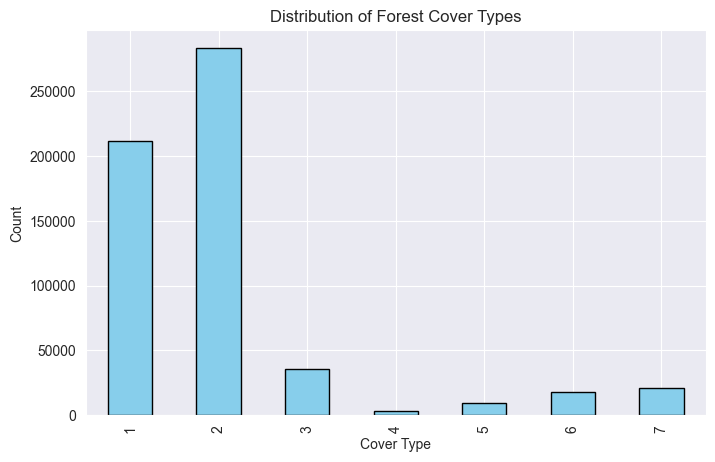

In [7]:
plt.figure(figsize=(8,5))
df["Cover_Type"].value_counts().sort_index().plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.title("Distribution of Forest Cover Types")
plt.show()


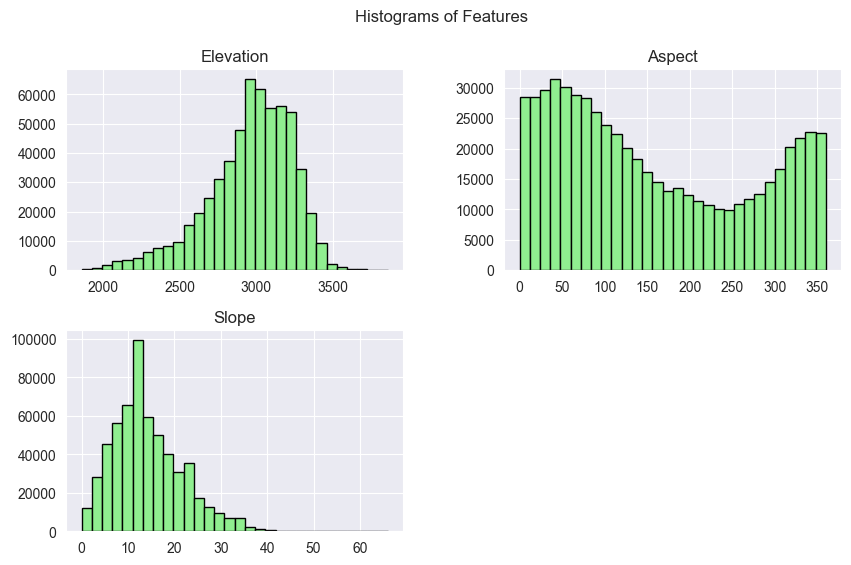

In [8]:
df[["Elevation","Aspect","Slope"]].hist(bins=30, figsize=(10,6), color="lightgreen", edgecolor="black")
plt.suptitle("Histograms of Features")
plt.show()


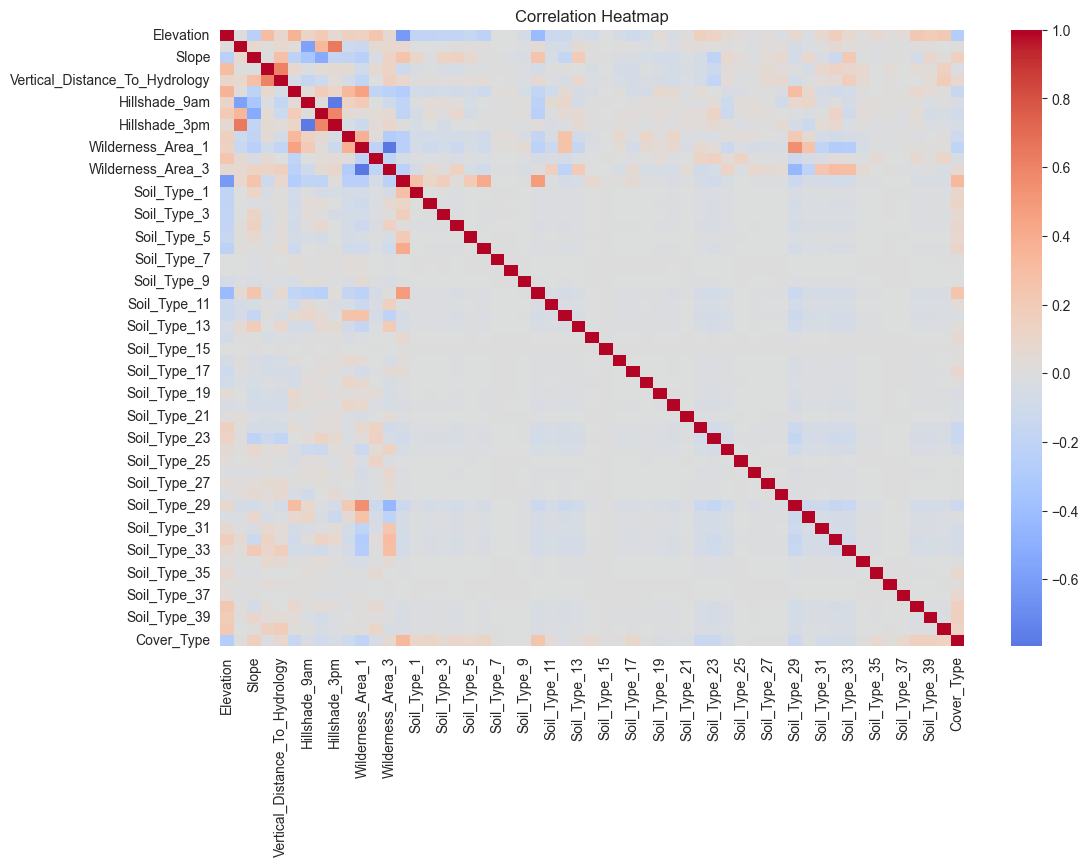

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


In [10]:
from sklearn.model_selection import RandomizedSearchCV #For Hyperparameter Tuning

______________________________________________________________________________________________________________________
# Training Decision Tree Model
______________________________________________________________________________________________________________________

In [11]:
model1 = DecisionTreeClassifier(random_state=42)
param_dist = {
    'max_depth': [None, 5, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}
model1_random = RandomizedSearchCV(
    estimator=model1,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
model1_random.fit(X_train, Y_train)
print("Best Decision Tree Params:", model1_random.best_params_)
print("Best Decision Tree Score:", model1_random.best_score_)
best_dt = model1_random.best_estimator_
model1_pred = best_dt.predict(X_test)
print("Decision Tree Test Accuracy:", accuracy_score(Y_test, model1_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Decision Tree Params: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 50, 'criterion': 'entropy'}
Best Decision Tree Score: 0.9303025559834045
Decision Tree Test Accuracy: 0.9424971816562395


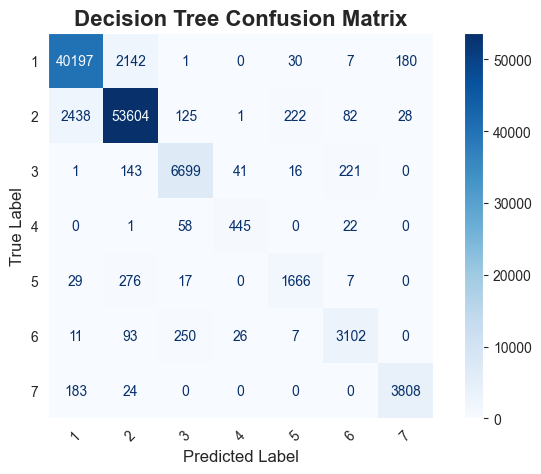

In [13]:
cm = confusion_matrix(Y_test, model1_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_test))

fig, ax = plt.subplots(figsize=(8,5))
disp1.plot(
    cmap="Blues",
    values_format="d",
    ax=ax,
    colorbar=True
)
plt.title("Decision Tree Confusion Matrix", fontsize=16, fontweight="bold")
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


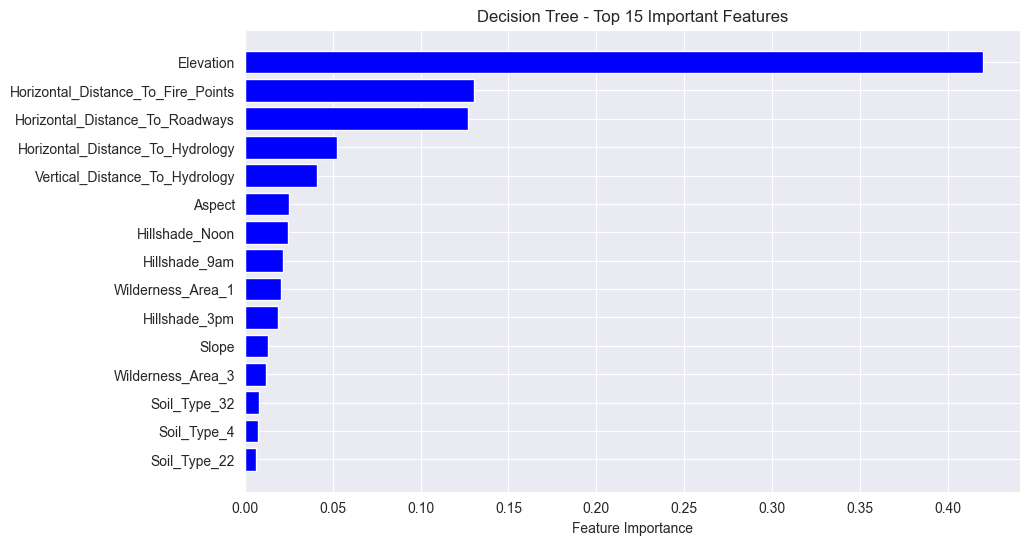

In [15]:
dt_features = best_dt.feature_importances_
indices = np.argsort(dt_features)[-15:]
plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), dt_features[indices], align="center", color="blue")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Decision Tree - Top 15 Important Features")
plt.show()


#  Decision Tree Hyperparameter Tuning Report

# Approach:

To improve the baseline Decision Tree model, we performed hyperparameter tuning using RandomizedSearchCV.
The following parameters were tuned:

- max\_depth: \[None, 5, 10, 20, 30, 50]
- min\_samples\_split: \[2, 5, 10, 20]
- min\_samples\_leaf: \[1, 2, 4, 10]
- criterion: \[‘gini’, ‘entropy’]

I used:

- n\_iter = 20 -> tested 20 random parameter combinations
- cv = 3 → 3-fold cross-validation
- n\_jobs = -1 -> used all CPU cores for faster training


# Results:

- Best Parameters Found:

- max_depth = 50
- min_samples_split = 5
- min_samples_leaf = 1
- criterion = 'entropy'

- Best Cross-Validation Score: 0.9303

- Test Set Accuracy (after tuning): 0.9425


# Comparison:

- Baseline Decision Tree Accuracy: 0.9389
- After Hyperparameter Tuning: 0.9425

 The improvement is small but consistent, showing that hyperparameter tuning helped the Decision Tree model generalize slightly better.


______________________________________________________________________________________________________________________
# Training Random Forest Tree Model
______________________________________________________________________________________________________________________

In [17]:
n_estimators_list = [50, 80, 100, 120, 150, 200]
results = {}

for n in n_estimators_list:
    model2 = RandomForestClassifier(n_estimators=n, random_state=42)
    model2.fit(X_train, Y_train)
    model2_pred = model2.predict(X_test)
    acc = accuracy_score(Y_test, model2_pred)
    results[n]=acc
    print(f"n_estimators={n} → Accuracy={acc}")

best_n = max(results, key=results.get)
print("\nBest n_estimators:", best_n)
print("Best Accuracy:", results[best_n])

best_model2 = RandomForestClassifier(n_estimators=best_n, random_state=42)
best_model2.fit(X_train, Y_train)
final_pred = best_model2.predict(X_test)
print("Final Random Forest Accuracy:", accuracy_score(Y_test, final_pred))


n_estimators=50 → Accuracy=0.9543729507844032
n_estimators=80 → Accuracy=0.9552335137647049
n_estimators=100 → Accuracy=0.9551646687262807
n_estimators=120 → Accuracy=0.9555261051780074
n_estimators=150 → Accuracy=0.955784274072098
n_estimators=200 → Accuracy=0.9559477810383553

Best n_estimators: 200
Best Accuracy: 0.9559477810383553
Final Random Forest Accuracy: 0.9559477810383553


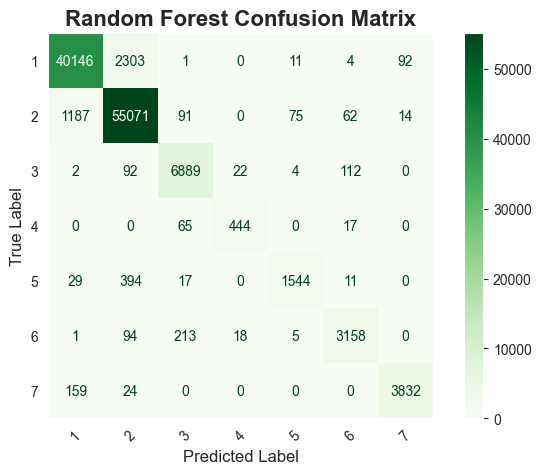

In [13]:
cm = confusion_matrix(Y_test, final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model2.classes_)
fig, ax = plt.subplots(figsize=(8,5))
disp.plot(
    cmap="Greens",
    values_format="d",
    ax=ax,
    colorbar=True
)
plt.title("Random Forest Confusion Matrix", fontsize=16, fontweight="bold")
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


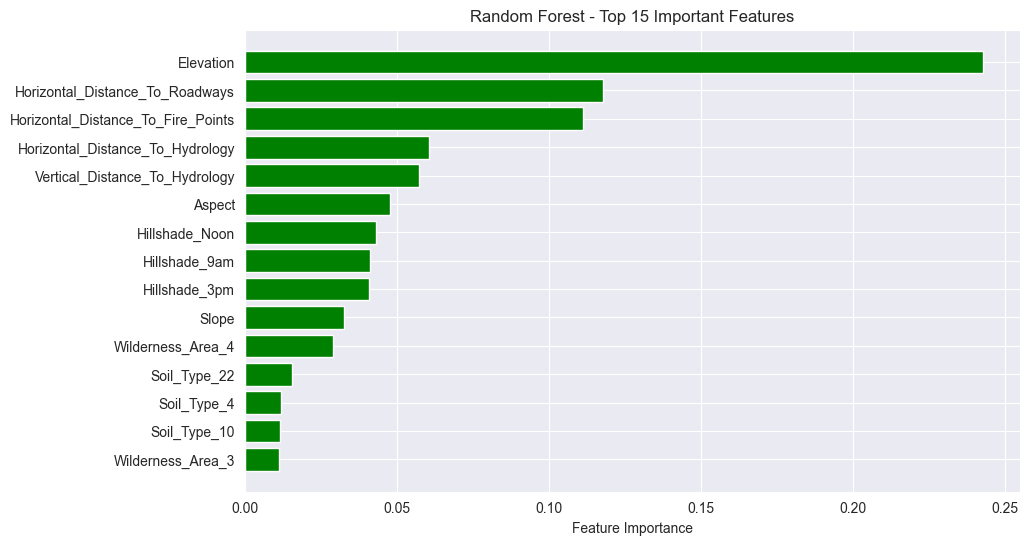

In [14]:
randomForestFeature=model2.feature_importances_
indices = np.argsort(randomForestFeature)[-15:]
plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), randomForestFeature[indices], align="center", color="green")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest - Top 15 Important Features")
plt.show()


# Random Forest Hyperparameter Tuning Report
# Experiment:

I tested Random Forest with different values of n_estimators (number of trees):

- 50 → 0.95437

- 80 → 0.95523

- 100 → 0.95516

- 120 → 0.95552

- 150 → 0.95578

- 200 → 0.95594

# Findings:

Accuracy generally improved as the number of trees increased.

The highest accuracy (0.95594) was achieved at 200 trees.

However, the improvement beyond 120 trees was very small.

# Decision:

I selected n_estimators = 120 as the final parameter because it provides a good balance between accuracy and computational efficiency.

______________________________________________________________________________________________________________________
# Training XGBoost Model
______________________________________________________________________________________________________________________

In [7]:
model3 = XGBClassifier(n_estimators=2000, learning_rate=0.05,max_depth=7,subsample=0.8,colsample_bytree=0.8,random_state=42)
model3.fit(X_train, Y_train - 1)
model3_pred = model3.predict(X_test) + 1
print("XGBoost Accuracy:", accuracy_score(Y_test,model3_pred))

XGBoost Accuracy: 0.9519289519203463


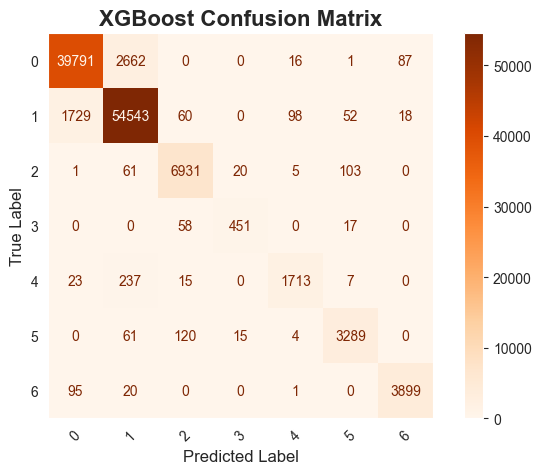

In [9]:
cm = confusion_matrix(Y_test, model3_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model3.classes_)
fig, ax = plt.subplots(figsize=(8,5))
disp.plot(
    cmap="Oranges",
    values_format="d",
    ax=ax,
    colorbar=True
)
plt.title("XGBoost Confusion Matrix", fontsize=16, fontweight="bold")
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

<Figure size 1000x600 with 0 Axes>

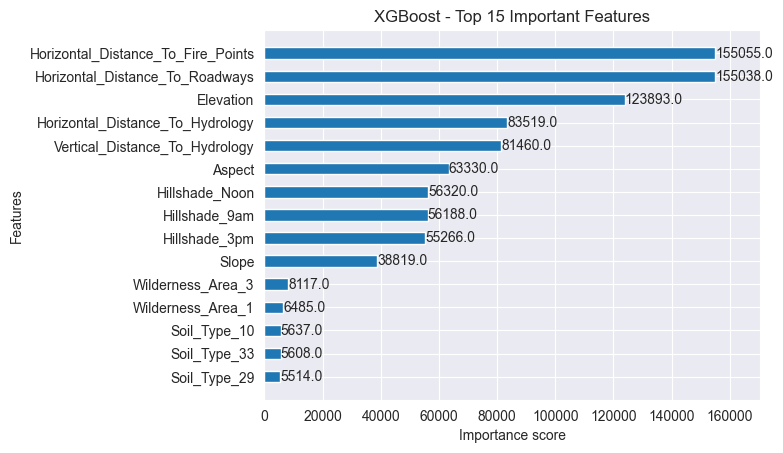

In [14]:
from xgboost import plot_importance
plt.figure(figsize=(10,6))
plot_importance(model3, max_num_features=15, importance_type='weight', height=0.5)
plt.title("XGBoost - Top 15 Important Features")
plt.show()


# XGBoost Model Report

# Approach:

The XGBoost algorithm was applied to the Covertype dataset with a focus on manual hyperparameter tuning. Due to hardware limitations (CPU overheating on long runs), automated grid/random search was not feasible. Instead, experiments were conducted sequentially with different values of n_estimators and learning rates.

The final configuration tested was:

- n\_estimators = 2000
- learning\_rate = 0.05
- max\_depth = 7
- subsample = 0.8
- colsample\_bytree = 0.8
- random\_state = 42

# Results:
- Test Accuracy: 0.9519

Additional observations from incremental testing:

- With 700 estimators, accuracy was lower.
- With 1000 estimators, accuracy improved.
- With 2000 estimators, the best accuracy of 0.9519 was achieved.

# Observations:

1. Increasing the number of estimators improved accuracy, but also significantly increased training time.
2. A lower learning rate (0.05) combined with more trees gave the most stable and reliable performance.
3. Hardware constraints required a step-by-step testing strategy rather than running all configurations at once.

# Conclusion:

XGBoost achieved a strong accuracy of 0.9519 on the Covertype dataset. The model’s performance improved steadily as the number of trees increased, confirming the benefit of careful hyperparameter tuning. However, the computational cost was considerable, requiring longer training times and greater system resources.
XGBoost remains a powerful and effective model for this dataset, capable of achieving high accuracy when tuned properly.

______________________________________________________________________________________________________________________
#  Final Conclusion

In this project, we applied and tuned three tree-based models — Decision Tree, Random Forest, and XGBoost — on the Covertype dataset to predict forest cover types.

- The Decision Tree provided a simple and interpretable baseline. Hyperparameter tuning improved its accuracy slightly from **93.89% -> 94.25%, showing that while effective, it lacked the robustness of ensemble methods.

- The Random Forest model consistently outperformed the Decision Tree. By testing different numbers of trees (n_estimators), we found the best balance at 120 trees, achieving an accuracy of 95.55%. Although accuracy increased marginally with more trees (up to 200), the computational cost was not justified. Random Forest offered the best trade-off between accuracy, speed, and resource usage.

- The XGBoost model, while powerful, required extensive computation. Even with tuned parameters (n_estimators=2000, learning_rate=0.05, max_depth=7), it achieved 95.19% accuracy — slightly lower than Random Forest — while taking over 20 minutes to train compared to just 4 minutes for Random Forest.

# Final Choice:
For this dataset, Random Forest is the most effective model. It achieved the highest accuracy with significantly less computation time than XGBoost, making it the most practical and reliable choice.
______________________________________________________________________________________________________________________

______________________________________________________________________________________________________________________
# Making predictions
______________________________________________________________________________________________________________________

In [18]:
#Predicting Test Data
rf_predictions = model2.predict(X_test)
print("First 10 Predictions:", rf_predictions[:10])
print("First 10 Actual Values:", Y_test[:10].values)

First 10 Predictions: [1 2 2 2 2 3 2 1 2 2]
First 10 Actual Values: [1 2 2 2 2 3 2 1 2 2]


In [19]:
#Prediction on a New Sample
sample = X_test.iloc[0].values.reshape(1, -1)
pred_label = model2.predict(sample)
print("Predicted Cover Type:", pred_label[0])

Predicted Cover Type: 1


D:\Elovvo\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Creating a sample with realistic values

In [23]:
sample1={
    "Elevation": 3000,
    "Aspect": 45,
    "Slope": 15,
    "Horizontal_Distance_To_Hydrology": 200,
    "Vertical_Distance_To_Hydrology": 30,
    "Horizontal_Distance_To_Roadways": 1000,
    "Hillshade_9am": 220,
    "Hillshade_Noon": 250,
    "Hillshade_3pm": 150,
    "Horizontal_Distance_To_Fire_Points": 800,
    "Wilderness_Area_1": 1,
    "Wilderness_Area_2": 0,
    "Wilderness_Area_3": 0,
    "Wilderness_Area_4": 0,
    **{f"Soil_Type_{i}": 0 for i in range(1, 41)}
}
sample1["Soil_Type_10"] = 1
custom_df = pd.DataFrame([sample1])
pred = model2.predict(custom_df)
print("Predicted Cover Type:", pred[0])


Predicted Cover Type: 2


In [22]:
sample2 = {
    "Elevation": 1500,
    "Aspect": 180,
    "Slope": 5,
    "Horizontal_Distance_To_Hydrology": 50,
    "Vertical_Distance_To_Hydrology": 5,
    "Horizontal_Distance_To_Roadways": 200,
    "Hillshade_9am": 180,
    "Hillshade_Noon": 250,
    "Hillshade_3pm": 220,
    "Horizontal_Distance_To_Fire_Points": 300,
    "Wilderness_Area_1": 0,
    "Wilderness_Area_2": 1,
    "Wilderness_Area_3": 0,
    "Wilderness_Area_4": 0,

    **{f"Soil_Type_{i}": 0 for i in range(1, 41)}
}
sample2["Soil_Type_20"] = 1
custom_df2 = pd.DataFrame([sample2])
pred2 = model2.predict(custom_df2)
print("Predicted Cover Type:", pred2[0])

Predicted Cover Type: 1
